<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/Images/SN_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


<h1>Extracting Stock Data Using a Python Library and a Web Scraping</h1>


## Import the important libraties


In [12]:

# For handling data
import pandas as pd

# For working with stock data
import yfinance as yf

# For web scraping
import requests
from bs4 import BeautifulSoup

# For data visualization (used in graphing stock data)
import matplotlib.pyplot as plt


### Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below

In [13]:
# Step 1: Download Tesla Stock Data

tesla_data = yf.Ticker("TSLA").history(period="max")

In [14]:
# Step 2: Reset the Index

tesla_data.reset_index(inplace=True)

In [15]:
# Step 3: Display the First Five Rows

tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [35]:
# Step 1: Send an HTTP Request Using requests
# URL of the Tesla revenue data page
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
# Send HTTP GET request
html_data = requests.get(url).text

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

In [ ]:
# Step 2 Create an empty DataFrame with Date and Revenue columns
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Try with the first tbody
for row in soup.find_all("tbody")[0].find_all("tr"):
    col = row.find_all("td")
    if len(col) >= 2:
        date = col[0].text
        revenue = col[1].text
        print(date, revenue)  # print to check values

# Print the Last 5 Rows
tesla_revenue.tail()

### Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.



In [39]:
# Stage 1 Download historical stock data for GameStop (GME)
gme_data = yf.Ticker("GME").history(period="max")

# Stage 2 Reset the index so that the date becomes a column
gme_data.reset_index(inplace=True)

# Stage 3 Display the first five rows of the resulting DataFrame
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


### Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function.

In [ ]:
# Step 1: Send a request to the GME revenue page on Macrotrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

# Step 2: Use BeautifulSoup to parse the HTML content
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Create an empty DataFrame for the revenue data
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Step 4: Extract the revenue table data manually by inspecting the HTML structure
for row in soup.find_all("tbody")[1].find_all("tr"):
    cols = row.find_all("td")
    if len(cols) >= 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])])

# Step 5: Display the last five rows
print(gme_revenue.tail())


### Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

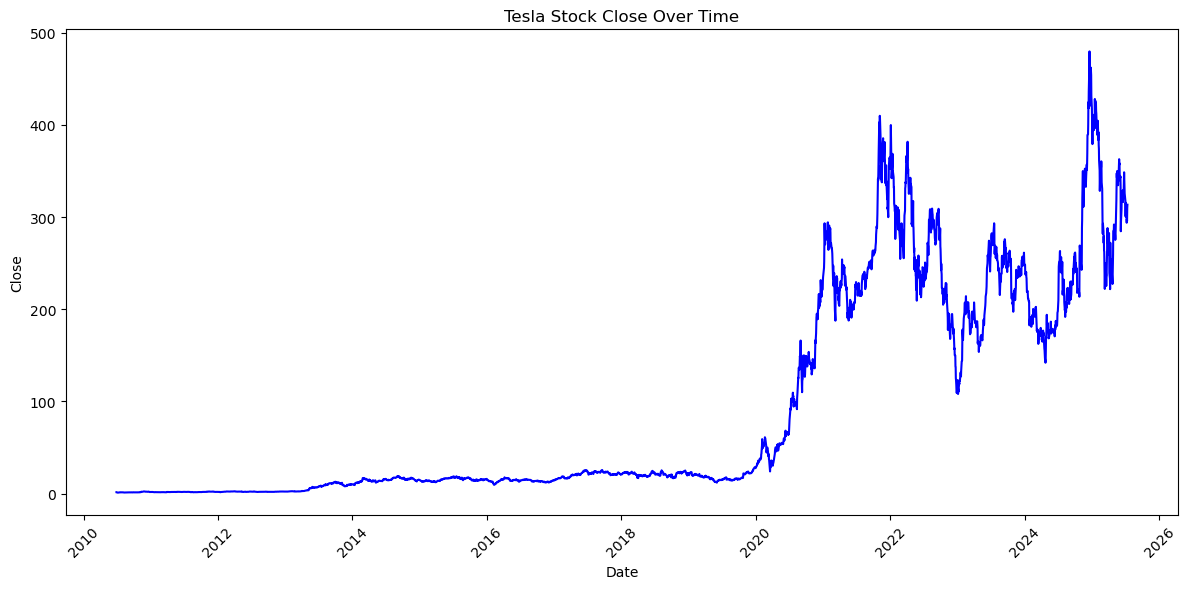

In [44]:
# Function to plot the stock data
def make_graph(data, stock, col):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data[col], label=col, color='blue')
    plt.title(f"{stock} Stock {col} Over Time")
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
# Call the function to plot Tesla stock's closing price
make_graph(tesla_data, 'Tesla', 'Close')

### Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

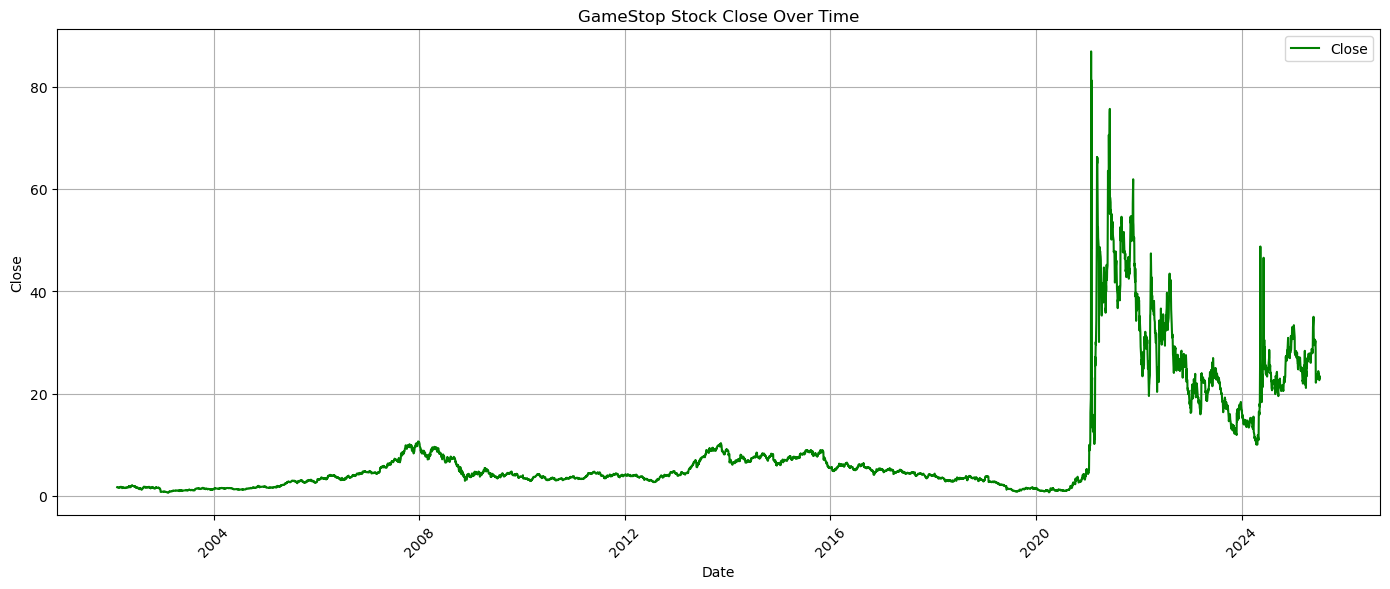

In [45]:
# Function to plot the stock data 
def make_graph(data, stock, col):
    plt.figure(figsize=(14, 6))
    plt.plot(data['Date'], data[col], label=col, color='green')
    plt.title(f"{stock} Stock {col} Over Time")
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot the GameStop stock closing price
make_graph(gme_data, 'GameStop', 'Close')
